The dataset contains 4 classes: NonDemented, VeryMildDemented, MildDemented, ModerateDemented.

There is no description of the dataset except for the folder names. It seemes that some images are of the same person judging by the file name.

Unequal representation of classes:
- make a visual representation of the distribution of classes (histogram/countplot)
- think about adjusting weights of the classes.

The dataset is already split in train and test.


Plan:
- Library imports
- Declare ImageGenerator for enriching the images
(here, different options can be used, this can be potentially be used to act on the performance of the model).
- Decide on batch size (32 seen on kaggle)
- Create train_generator and test_generator by .flow_from_directory
- Create a simple network and run it on colab (and if possible, on Laurent's computer)
- Save model (is it h5 format or can we get it in pkl format like scikit learn models?)
- Save model history
- (optionnaly: visualize performance with plotly)

In [2]:
# imports
import os
import tensorflow as tf 

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.offline as py
import plotly.tools as tls

from pathlib import Path

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve

import pandas as pd

pio.templates.default = "plotly_dark"
matplotlib.style.use('dark_background')

In [3]:
# importing dataset from
import pathlib

#importing unsplit dataset
data_root_orig = tf.keras.utils.get_file(origin='https://brain-disease-detector.s3.eu-west-3.amazonaws.com/alzheimer_no_split_folders_renamed.zip',
                                         fname='/content/alzheimer.zip',
                                         cache_subdir="/content",
                                         archive_format='zip',
                                         extract=True)

In [6]:
class_names = os.listdir('/content/alzheimer_no_split_folders_renamed')

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: '/content/Alzheimer_s Dataset_no_split'

In [ ]:
class_names

['NonDemented', 'MildDemented', 'ModerateDemented', 'VeryMildDemented']

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/output_alzheimer_no_split_folders_renamed', output='/content/output_v5', ratio=(0.64, 0.16, 0.20))

Copying files: 6400 files [00:00, 7657.64 files/s]


In [ ]:
image_dir_path = '.'
paths = [path.parts[-3:] for path in
         Path('/content/output_v5').rglob('*.jpg')]
df = pd.DataFrame(data=paths, columns=['folder', 'class', 'file_name'])
print(df.head(10))
print(df.tail(10))

  folder        class       file_name
0    val  NonDemented     29 (48).jpg
1    val  NonDemented  nonDem1529.jpg
2    val  NonDemented  nonDem1658.jpg
3    val  NonDemented     31 (79).jpg
4    val  NonDemented     27 (95).jpg
5    val  NonDemented  nonDem1485.jpg
6    val  NonDemented  nonDem1000.jpg
7    val  NonDemented   nonDem971.jpg
8    val  NonDemented   nonDem316.jpg
9    val  NonDemented     27 (68).jpg
     folder             class            file_name
6390   test  VeryMildDemented   verymildDem681.jpg
6391   test  VeryMildDemented   verymildDem604.jpg
6392   test  VeryMildDemented  verymildDem1301.jpg
6393   test  VeryMildDemented  verymildDem1203.jpg
6394   test  VeryMildDemented   verymildDem842.jpg
6395   test  VeryMildDemented  verymildDem1465.jpg
6396   test  VeryMildDemented          29 (21).jpg
6397   test  VeryMildDemented  verymildDem1410.jpg
6398   test  VeryMildDemented   verymildDem494.jpg
6399   test  VeryMildDemented          29 (23).jpg


In [ ]:
df.groupby(['folder', 'class']).size()

folder  class           
test    MildDemented         180
        ModerateDemented      14
        NonDemented          640
        VeryMildDemented     449
train   MildDemented         573
        ModerateDemented      40
        NonDemented         2048
        VeryMildDemented    1433
val     MildDemented         143
        ModerateDemented      10
        NonDemented          512
        VeryMildDemented     358
dtype: int64

In [ ]:
df[df["folder"]=="train"].groupby(["class"]).size()/len(df[df["folder"]=="train"])

class
MildDemented        0.139961
ModerateDemented    0.009770
NonDemented         0.500244
VeryMildDemented    0.350024
dtype: float64

In [ ]:
df[df["folder"]=="val"].groupby(["class"]).size()/len(df[df["folder"]=="val"])

class
MildDemented        0.139785
ModerateDemented    0.009775
NonDemented         0.500489
VeryMildDemented    0.349951
dtype: float64

In [ ]:
df[df["folder"]=="test"].groupby(["class"]).size()/len(df[df["folder"]=="test"])

class
MildDemented        0.140296
ModerateDemented    0.010912
NonDemented         0.498831
VeryMildDemented    0.349961
dtype: float64

In [ ]:
#class_names

In [ ]:
#define image dataset 


#train_image_generator = ImageDataGenerator(rescale=1/255, brightness_range=[0.5,1.5])
train_image_generator = ImageDataGenerator(rescale=1/255)

val_image_generator = ImageDataGenerator(rescale=1/255)

test_image_generator = ImageDataGenerator(rescale=1/255)


train_dataset = train_image_generator.flow_from_directory(batch_size=8,
                                                 directory='/content/output_v5/train',
                                                 shuffle=True,
                                                 target_size=(176,208), 
                                                 class_mode='categorical')

validation_dataset = val_image_generator.flow_from_directory(batch_size=8,
                                                 directory='/content/output_v5/val',
                                                 shuffle=True,
                                                 target_size=(176,208), 
                                                 class_mode='categorical')

test_dataset = test_image_generator.flow_from_directory(batch_size=1300,
                                                 directory='/content/output_v5/test',
                                                 shuffle=True,
                                                 target_size=(176,208))

Found 4094 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1283 images belonging to 4 classes.


In [ ]:
train_images, train_labels = train_dataset.next()

In [ ]:
print(train_labels)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [ ]:
validation_images, validation_labels = validation_dataset.next()

In [ ]:
print(validation_labels)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
test_images, test_labels = test_dataset.next()

In [ ]:
print(test_labels)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
train_dataset.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
test_dataset.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
class_indices = {v:k for k,v in train_dataset.class_indices.items()}

Class :  NonDemented


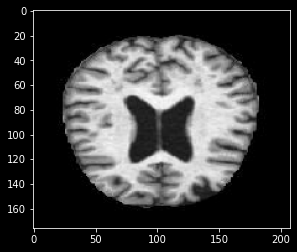

Class :  VeryMildDemented


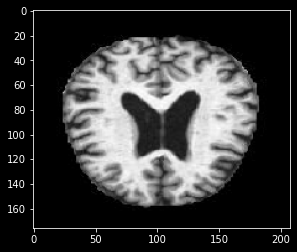

Class :  MildDemented


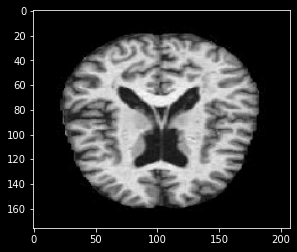

Class :  NonDemented


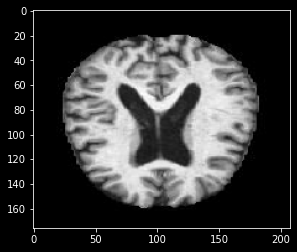

Class :  NonDemented


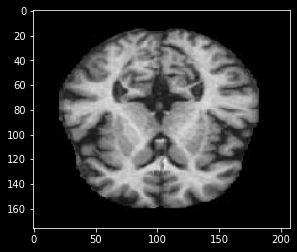

Class :  VeryMildDemented


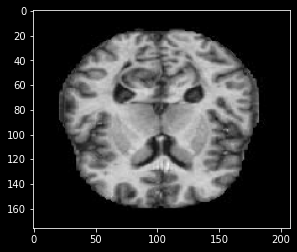

Class :  NonDemented


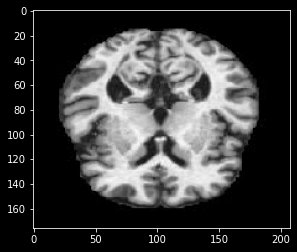

Class :  MildDemented


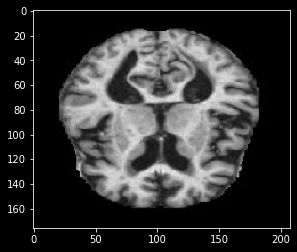

In [ ]:
imgs, targets = next(iter(train_dataset))

for i, (img, target) in enumerate(zip(imgs, targets)):
  print('Class : ', class_indices[np.argmax(target)])
  plt.imshow(img)
  plt.show()

In [ ]:

model = tf.keras.Sequential([

     Conv2D(filters = 16, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu", input_shape = (176, 208, 3)), # the input shape (height, width, channels)
     MaxPool2D(pool_size=2, # the size of the pooling window
               strides=2), # the movement of the pooling on the input
     Dropout(0.1),
     Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu"),
     MaxPool2D(2,2),
     Dropout(0.1),
     Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu"),
     MaxPool2D(2,2),
     Dropout(0.1),
     tf.keras.layers.Flatten(), # this layer turns multi-dimensional images into flat objects
     tf.keras.layers.Dense(128, activation="relu"),
     Dropout(0.1),
     tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dense(4, activation="softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 88, 104, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 104, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 52, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 44, 52, 32)        0

In [ ]:
"""from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
           'balanced', 
           classes=np.unique(train_dataset.classes),
           y = train_dataset.classes)

train_class_weights = dict(enumerate(class_weights))"""

"from sklearn.utils import class_weight\nclass_weights = class_weight.compute_class_weight(\n           'balanced', \n           classes=np.unique(train_dataset.classes),\n           y = train_dataset.classes)\n\ntrain_class_weights = dict(enumerate(class_weights))"

In [ ]:
# Defining metrics and optimization

METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='acc'),
    tf.keras.metrics.AUC(name='auc'),
    tfa.metrics.F1Score(num_classes=4)
    ]

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=False)


In [ ]:
initial_learning_rate = 0.0005

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = METRICS)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 88, 104, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 104, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 52, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 44, 52, 32)        0

In [ ]:
EPOCHS = 50

"""history = model.fit(train_dataset, validation_data=validation_dataset, 
                    class_weight=train_class_weights, shuffle=True, epochs=EPOCHS)"""
history = model.fit(train_dataset, validation_data=validation_dataset,shuffle=True, epochs=EPOCHS)


Epoch 1/5
512/512 [==============================] - 17s 12ms/step - loss: 1.0025 - acc: 0.5156 - auc: 0.8059 - f1_score: 0.2562 - val_loss: 0.9022 - val_acc: 0.5601 - val_auc: 0.8437 - val_f1_score: 0.2885
Epoch 2/5
512/512 [==============================] - 6s 11ms/step - loss: 0.8377 - acc: 0.6182 - auc: 0.8693 - f1_score: 0.3914 - val_loss: 0.7804 - val_acc: 0.6129 - val_auc: 0.8868 - val_f1_score: 0.3667
Epoch 3/5
512/512 [==============================] - 6s 11ms/step - loss: 0.6303 - acc: 0.7308 - auc: 0.9286 - f1_score: 0.5203 - val_loss: 0.5231 - val_acc: 0.7820 - val_auc: 0.9506 - val_f1_score: 0.5695
Epoch 4/5
512/512 [==============================] - 6s 11ms/step - loss: 0.4084 - acc: 0.8339 - auc: 0.9702 - f1_score: 0.7483 - val_loss: 0.3215 - val_acc: 0.8788 - val_auc: 0.9811 - val_f1_score: 0.8292
Epoch 5/5
512/512 [==============================] - 6s 11ms/step - loss: 0.2414 - acc: 0.9148 - auc: 0.9889 - f1_score: 0.8994 - val_loss: 0.1988 - val_acc: 0.9247 - val_auc:

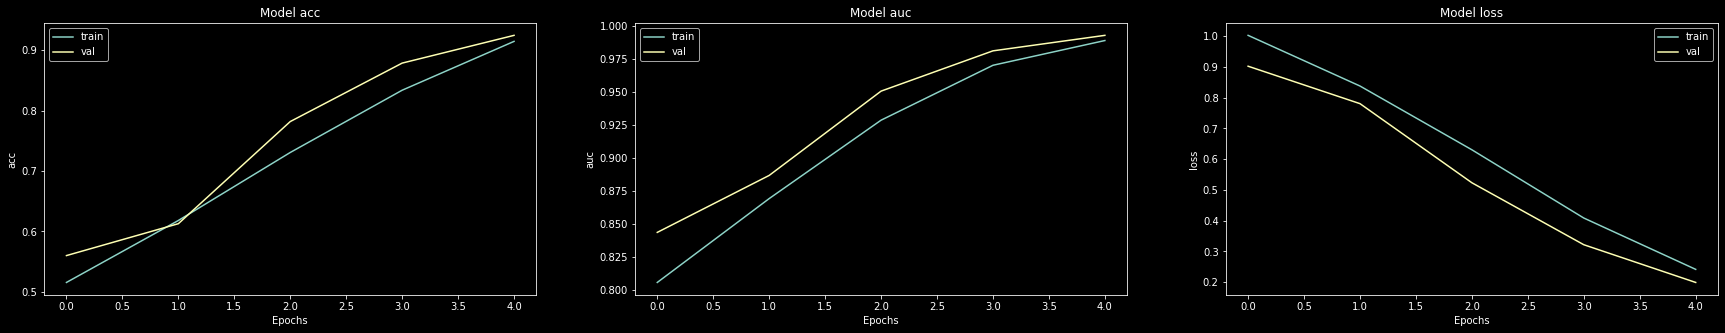

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])
fig.show()

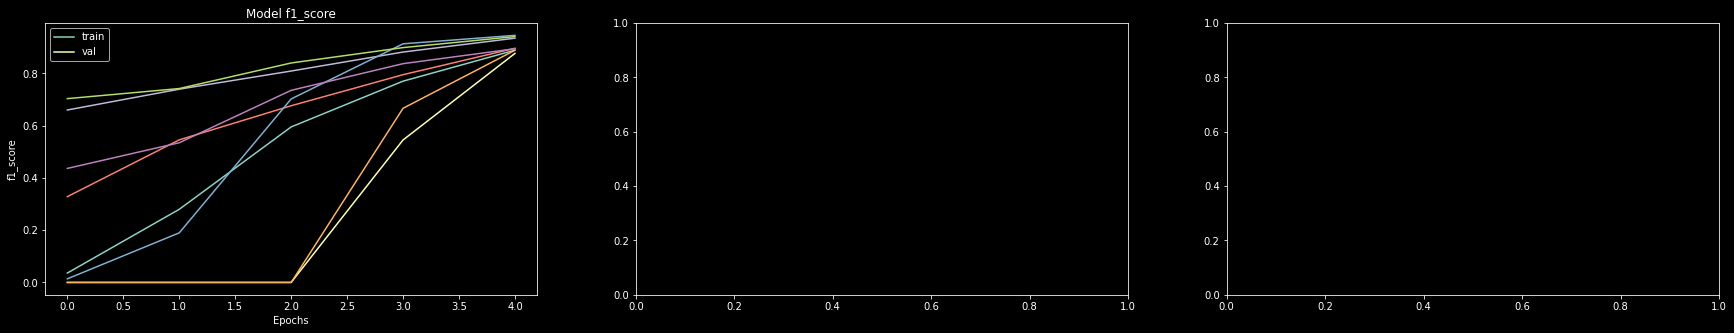

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["f1_score"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
train_dataset.class_indices.values()

dict_values([0, 1, 2, 3])

In [ ]:
type(train_dataset.class_indices.values())

dict_values

In [ ]:
# test dataset class_indices
test_dataset.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
# Evaluation on validation dataset
_ = model.evaluate(validation_dataset)

128/128 [==============================] - 1s 9ms/step - loss: 0.1988 - acc: 0.9247 - auc: 0.9928 - f1_score: 0.9176


In [ ]:
# Evaluation on test dataset
_ = model.evaluate(test_dataset)

1/1 [==============================] - 2s 2s/step - loss: 0.2207 - acc: 0.9213 - auc: 0.9910 - f1_score: 0.9074


In [ ]:
test_images, test_labels = test_dataset.next()

In [ ]:
test_dataset.class_indices.keys()

dict_keys(['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

In [ ]:
test_labels

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
len(test_labels)

1283

In [ ]:
#Predicting the test data
predicted_labels = model.predict(test_dataset)

1/1 [==============================] - 1s 1s/step


In [ ]:
predicted_labels

array([[8.6916760e-02, 2.7118742e-02, 6.2174555e-02, 8.2378995e-01],
       [1.6842155e-02, 8.2418299e-04, 8.9125341e-01, 9.1080308e-02],
       [3.9763239e-05, 7.5028297e-06, 8.4968233e-01, 1.5027033e-01],
       ...,
       [3.2137055e-03, 6.5427041e-05, 8.4449393e-01, 1.5222694e-01],
       [2.2309719e-02, 1.5883497e-03, 4.5357868e-03, 9.7156626e-01],
       [9.5992279e-01, 3.2482052e-03, 1.8882738e-02, 1.7946251e-02]],
      dtype=float32)

In [ ]:
predicted_labels = np.argmax(predicted_labels, axis=1)

In [ ]:
predicted_labels

array([3, 2, 2, ..., 2, 3, 0])

In [ ]:
test_labels = np.argmax(test_labels, axis=1)

In [ ]:
test_labels

array([3, 2, 2, ..., 2, 3, 0])

In [ ]:
target_names = [k + ' : ' + str(v) for k,v in test_dataset.class_indices.items()]

In [ ]:
target_names

['MildDemented : 0',
 'ModerateDemented : 1',
 'NonDemented : 2',
 'VeryMildDemented : 3']

In [ ]:
print(classification_report(test_labels, predicted_labels, target_names = target_names))

                      precision    recall  f1-score   support

    MildDemented : 0       0.99      0.84      0.91       180
ModerateDemented : 1       1.00      0.79      0.88        14
     NonDemented : 2       0.95      0.94      0.94       640
VeryMildDemented : 3       0.87      0.93      0.90       449

            accuracy                           0.92      1283
           macro avg       0.95      0.87      0.91      1283
        weighted avg       0.92      0.92      0.92      1283



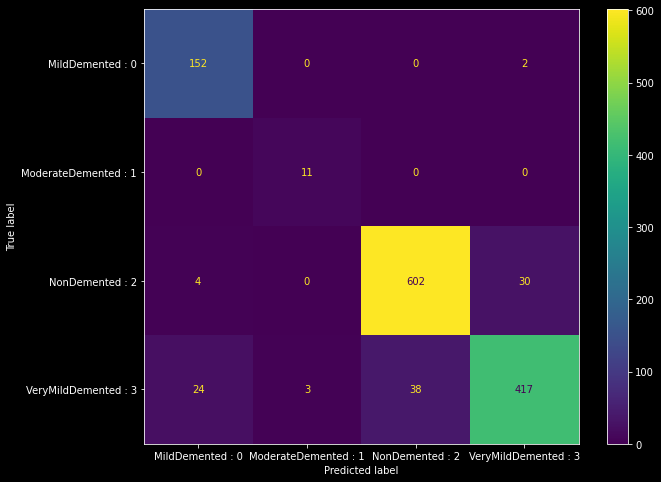

In [ ]:
cm = confusion_matrix(predicted_labels, test_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(10, 8))
cmp.plot(ax=ax)


In [ ]:
#Saving the model for future use
custom_cnn_model_dir = './models/' + "alzheimer_cnn_dropout_layers_lazy_adam.h5"
model.save(custom_cnn_model_dir, save_format='h5')
os.listdir('./models')

['alzheimer_cnn_dropout_layers_lazy_adam.h5']

### Grad-Cam visualisation

In [ ]:
class_indices = validation_dataset.class_indices
indices = {v:k for k,v in class_indices.items()}

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
filenames = validation_dataset.filenames

In [ ]:
y_val = validation_dataset.classes
y_pred = model.predict(validation_dataset)
y_pred = np.argmax(y_pred,axis=1)

128/128 [==============================] - 1s 9ms/step


In [ ]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

,filename,actual,predicted,Same
0,MildDemented/26 (19).jpg,MildDemented,MildDemented,True
1,MildDemented/26 (21).jpg,MildDemented,VeryMildDemented,False
2,MildDemented/26 (26).jpg,MildDemented,VeryMildDemented,False
3,MildDemented/27 (12).jpg,MildDemented,VeryMildDemented,False
4,MildDemented/27 (14).jpg,MildDemented,NonDemented,False
5,MildDemented/27 (15).jpg,MildDemented,NonDemented,False
6,MildDemented/27 (2).jpg,MildDemented,VeryMildDemented,False
7,MildDemented/27 (26).jpg,MildDemented,VeryMildDemented,False
8,MildDemented/27 (28).jpg,MildDemented,NonDemented,False
9,MildDemented/27.jpg,MildDemented,NonDemented,False


In [ ]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"..'/content/output_v5/val'{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]} P: {temp_df.predicted[i]}')

In [ ]:
# img_size = 32

In [ ]:
display_images(val_df[val_df['Same']==True])

In [ ]:
model.layers

In [ ]:
model.layers[-8]

In [ ]:
model.output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_2')>

In [ ]:
model.layers[-4]

In [ ]:
def make_gradcam_heatmap(img_array, model, pred_index=None):
    
    grad_model = tf.keras.Model(inputs=model.inputs, outputs=[model.layers[-8].output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

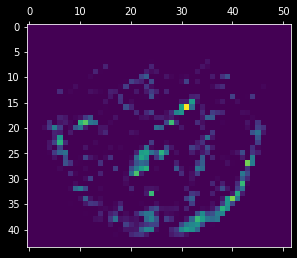

In [ ]:
heatmaps = []

for img in imgs:
  heatmap = make_gradcam_heatmap(
      tf.expand_dims(img, axis=0), model
  )
  heatmaps.append(heatmap)

# Display heatmap
plt.matshow(heatmaps[0])
plt.show()

In [ ]:
imgs, labels = validation_dataset.next()

In [ ]:
pred_labels = model.predict(imgs)

1/1 [==============================] - 0s 88ms/step


In [ ]:
validation_dataset.class_indices.items()

dict_items([('MildDemented', 0), ('ModerateDemented', 1), ('NonDemented', 2), ('VeryMildDemented', 3)])

Predicted label: NonDemented
True label: NonDemented


<ipython-input-100-08626f59a279>:30: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



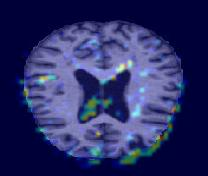

Predicted label: NonDemented
True label: NonDemented


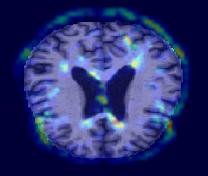

Predicted label: VeryMildDemented
True label: VeryMildDemented


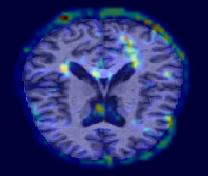

Predicted label: MildDemented
True label: MildDemented


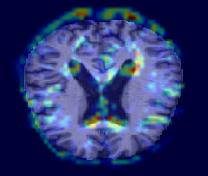

Predicted label: NonDemented
True label: NonDemented


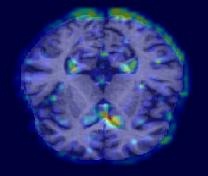

Predicted label: MildDemented
True label: MildDemented


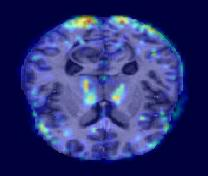

Predicted label: NonDemented
True label: NonDemented


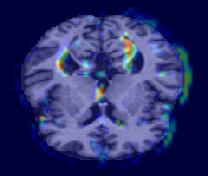

Predicted label: MildDemented
True label: MildDemented


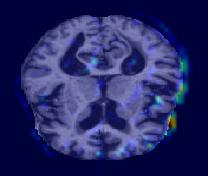

In [ ]:
from pathlib import Path
from matplotlib import cm
from IPython.display import Image

for img, pred_label, true_label, heatmap in zip(imgs, pred_labels, labels, heatmaps):
  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.003 + img
  superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

  # Save the superimposed image
  save_path = "saved_img.jpg"
  superimposed_img.save(save_path)

  # Display Grad CAM
  pred_file_path = np.argmax(validation_dataset.labels == pred_label)
  pred_label_name = Path(validation_dataset.filepaths[pred_file_path]).parent.name


  print("Predicted label:", class_indices[np.argmax(pred_label)])
  print("True label:", class_indices[np.argmax(true_label)])

  display(Image(save_path))